<a href="https://colab.research.google.com/github/pasumarthi/EIP4/blob/master/Session3/EIP4_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout,SeparableConv2D,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

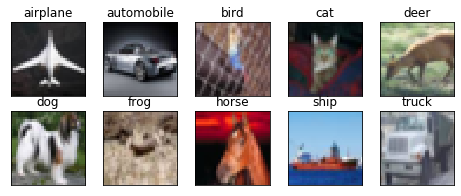

In [131]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 30s 77ms/step - loss: 1.8476 - acc: 0.2937 - val_loss: 1.4325 - val_acc: 0.4768
Epoch 2/50
390/390 [==============================] - 21s 53ms/step - loss: 1.3456 - acc: 0.5138 - val_loss: 1.1187 - val_acc: 0.5972
Epoch 3/50
390/390 [==============================] - 21s 53ms/step - loss: 1.1214 - acc: 0.6008 - val_loss: 0.9869 - val_acc: 0.6465
Epoch 4/50
390/390 [==============================] - 21s 53ms/step - loss: 0.9936 - acc: 0.6555 - val_loss: 0.9031 - val_acc: 0.6873
Epoch 5/50
390/390 [==============================] - 21s 53ms/step - loss: 0.9049 - acc: 0.6854 - val_loss: 0.9309 - val_acc: 0.6869
Epoch 6/50
390/390 [==============================] - 21s 53ms/step - loss: 0.8375 - acc: 0.7128 - val_loss: 0.7729 - val_acc: 0.7340
Epoch 7/50
390/390 [==============================] - 21s 53ms/step - loss: 0.7756 - acc: 0.7357 - val_loss: 0.7137 - val_acc: 0.7525
Epoch 8/50
390/390 [==============================] - 

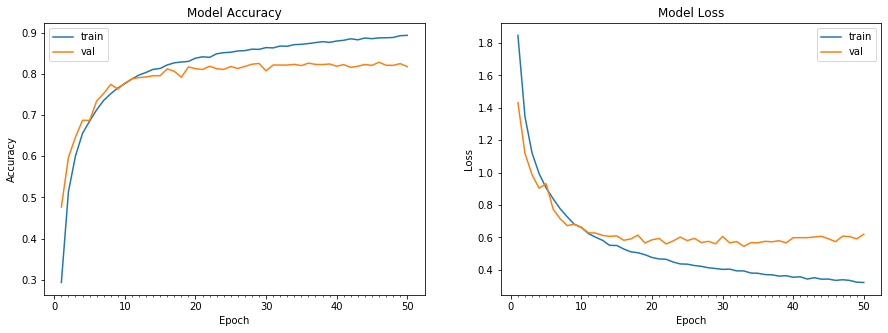

Accuracy on test data is: 81.78


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [142]:
dropout_rate = 0.1
model1 = Sequential()

model1.add(SeparableConv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same',strides=1)) # output channel size: 32 receptive field: 3
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(dropout_rate))


model1.add(SeparableConv2D(64, (3, 3), padding='same')) # output channel size: 32 receptive field: 5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(dropout_rate))


model1.add(SeparableConv2D(128, (3, 3),padding='same')) # output channel size: 32 receptive field: 7
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

#layer 3
model1.add(SeparableConv2D(32, (1, 1))) # output channel size: 16 receptive field: 8
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2))) #output channel size:16

model1.add(SeparableConv2D(64, (3, 3),padding='same')) # output channel size: 16 receptive field: 12
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(128, (3, 3))) # output channel size: 12 receptive field: 16
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(dropout_rate))

model1.add(SeparableConv2D(256, (3, 3))) # output channel size: 10 receptive field: 20
model1.add(Activation('relu'))


model1.add(SeparableConv2D(10, (10, 10))) # output channel size: 10 receptive field: 24
model1.add(GlobalAveragePooling2D())
model1.add(Activation('softmax'))
model1.summary()


Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_485 (Separa (None, 32, 32, 32)        155       
_________________________________________________________________
activation_483 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_332 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_328 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_486 (Separa (None, 32, 32, 64)        2400      
_________________________________________________________________
activation_484 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_333 (Bat (None, 32, 32, 64)      

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

In [0]:
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,LearningRateScheduler(scheduler)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 43s 110ms/step - loss: 1.2933 - acc: 0.5317 - val_loss: 1.3572 - val_acc: 0.5658

Epoch 00001: val_acc improved from -inf to 0.56580, saving model to weights-improvement-01-0.57.hdf5
Epoch 2/50
390/390 [==============================] - 18s 47ms/step - loss: 0.9029 - acc: 0.6826 - val_loss: 1.0260 - val_acc: 0.6665

Epoch 00002: val_acc improved from 0.56580 to 0.66650, saving model to weights-improvement-02-0.67.hdf5
Epoch 3/50
390/390 [==============================] - 18s 47ms/step - loss: 0.7610 - acc: 0.7349 - val_loss: 0.7759 - val_acc: 0.7225

Epoch 00003: val_acc improved from 0.66650 to 0.72250, saving model to weights-improvement-03-0.72.hdf5
Epoch 4/50
390/390 [==============================] - 18s 46ms/step - loss: 0.6642 - acc: 0.7677 - val_loss: 0.7183 - val_acc: 0.7565

Epoch 00004: val_acc improved from 0.72250 to 0.75650, saving model to weights-improvement-04-0.76.hdf5
Epoch 5/50
390/390 [==========================

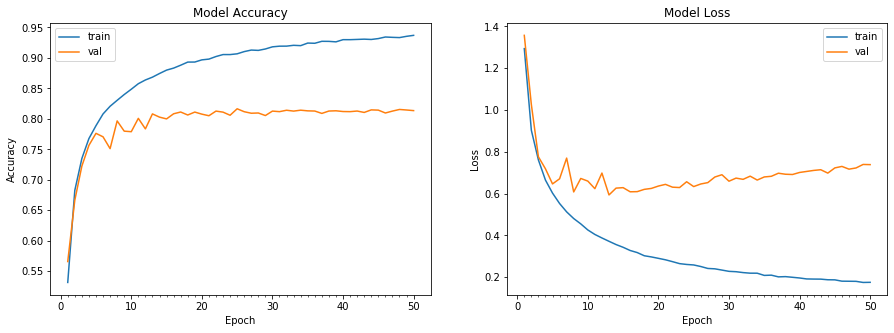

Accuracy on test data is: 81.35


In [146]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), callbacks=callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))

# increased drop out to reduce overfitting

In [35]:
'''#dropout_rate = 0.1
model1 = Sequential()

#layer 1 
model1.add(SeparableConv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same',strides=1)) # output channel size: 32 receptive field: 3
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))


model1.add(SeparableConv2D(64, (3, 3), padding='same')) # output channel size: 32 receptive field: 3
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

#layer 2
model1.add(SeparableConv2D(128, (3, 3),padding='same')) # output channel size: 32 receptive field: 5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

#layer 3
model1.add(SeparableConv2D(32, (1, 1))) # output channel size: 16 receptive field: 7 
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2))) #output channel size:16

model1.add(SeparableConv2D(64, (3, 3),padding='same')) # output channel size: 28 receptive field: 5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(SeparableConv2D(128, (3, 3))) # output channel size: 14 receptive field: 5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(256, (3, 3))) # output channel size: 12 receptive field: 5
model1.add(Activation('relu'))


model1.add(SeparableConv2D(10, (10, 10))) # output channel size: 10 receptive field: 32
model1.add(GlobalAveragePooling2D())
model1.add(Activation('softmax'))
model1.summary()
'''

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_71 (Separab (None, 32, 32, 32)        155       
_________________________________________________________________
activation_70 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_47 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_47 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_72 (Separab (None, 32, 32, 64)        2400      
_________________________________________________________________
activation_71 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_48 (Batc (None, 32, 32, 64)      

In [40]:
'''#dropout_rate = 0.1
model1 = Sequential()

#layer 1 
model1.add(SeparableConv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same',strides=1)) # output channel size: 32 receptive field: 3
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))


model1.add(SeparableConv2D(64, (3, 3), padding='same')) # output channel size: 32 receptive field: 3
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

#layer 2
model1.add(SeparableConv2D(128, (3, 3),padding='same')) # output channel size: 32 receptive field: 5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))

#layer 3
model1.add(SeparableConv2D(32, (1, 1))) # output channel size: 16 receptive field: 7 
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2))) #output channel size:16

model1.add(SeparableConv2D(64, (3, 3),padding='same')) # output channel size: 28 receptive field: 5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(SeparableConv2D(128, (3, 3))) # output channel size: 14 receptive field: 5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(256, (3, 3))) # output channel size: 12 receptive field: 5
model1.add(Activation('relu'))


model1.add(SeparableConv2D(10, (10, 10))) # output channel size: 10 receptive field: 32
model1.add(GlobalAveragePooling2D())
model1.add(Activation('softmax'))
model1.summary()'''


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_79 (Separab (None, 32, 32, 32)        155       
_________________________________________________________________
activation_78 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_52 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_52 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_80 (Separab (None, 32, 32, 64)        2400      
_________________________________________________________________
activation_79 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_53 (Batc (None, 32, 32, 64)      

In [0]:
'''# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint,LearningRateScheduler(scheduler)]'''

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
  3/390 [..............................] - ETA: 16s - loss: 1.0349 - acc: 0.6354

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


390/390 [==============================] - 16s 41ms/step - loss: 0.9602 - acc: 0.6617 - val_loss: 0.9021 - val_acc: 0.6838
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 16s 41ms/step - loss: 0.8092 - acc: 0.7149 - val_loss: 0.8943 - val_acc: 0.6899
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 16s 42ms/step - loss: 0.6998 - acc: 0.7517 - val_loss: 0.8555 - val_acc: 0.7134
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 16s 41ms/step - loss: 0.6334 - acc: 0.7787 - val_loss: 0.7590 - val_acc: 0.7453
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 16s 41ms/step - loss: 0.5809 - acc: 0.7959 - val_loss: 0.7497 - val_acc: 0.7500
Epoch 6/50

Epoch 00006: LearningRateSche

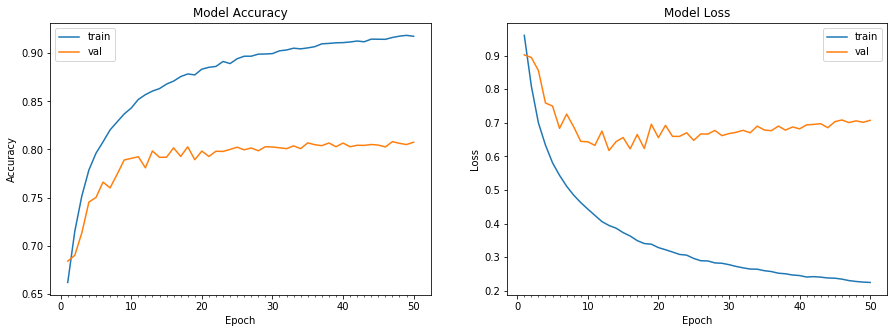

Accuracy on test data is: 80.75


In [45]:
'''from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))'''

In [98]:
'''#dropout_rate = 0.1
model1 = Sequential()

#layer 1 
model1.add(SeparableConv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same')) # output channel size: 32 receptive field: 3
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))


model1.add(SeparableConv2D(32, (3, 3),padding='same')) # output channel size: 32 receptive field: 5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(64, (3, 3))) # output channel size: 30 receptive field: 5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))


model1.add(SeparableConv2D(64, (3, 3))) # output channel size: 28 receptive field: 9
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

# maxpooling
model1.add(SeparableConv2D(16, (1, 1))) # output channel size: 14 receptive field: 7 
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2))) #output channel size:14

model1.add(SeparableConv2D(32, (3, 3),padding='same')) # output channel size: 14 receptive field: 9
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(SeparableConv2D(64, (3, 3),padding='same')) # output channel size: 14 receptive field: 5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(128, (3, 3),padding='same')) # output channel size: 14 receptive field: 5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(256, (3, 3))) # output channel size: 12 receptive field: 5
model1.add(Activation('relu'))


model1.add(SeparableConv2D(10, (10, 10))) # output channel size: 10 receptive field: 32
model1.add(GlobalAveragePooling2D())
model1.add(Activation('softmax'))
model1.summary()'''


Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_383 (Separa (None, 32, 32, 16)        91        
_________________________________________________________________
activation_381 (Activation)  (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_261 (Bat (None, 32, 32, 16)        64        
_________________________________________________________________
dropout_261 (Dropout)        (None, 32, 32, 16)        0         
_________________________________________________________________
separable_conv2d_384 (Separa (None, 32, 32, 32)        688       
_________________________________________________________________
activation_382 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_262 (Bat (None, 32, 32, 32)      

In [0]:
'''from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)'''

In [0]:
'''model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])'''

In [124]:
#dropout_rate = 0.1
model1 = Sequential()

#layer 1 
model1.add(SeparableConv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same')) # output channel size: 32 receptive field: 3
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))

model1.add(SeparableConv2D(64, (3, 3),padding='same')) # output channel size: 32 receptive field: 5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))


model1.add(SeparableConv2D(128, (3, 3),padding='same')) # output channel size: 32 receptive field: 5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(128, (3, 3))) # output channel size: 30 receptive field: 7
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))



# maxpooling
model1.add(SeparableConv2D(16, (1, 1))) # output channel size: 15 receptive field: 10
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2))) #output channel size:15

model1.add(SeparableConv2D(32, (3, 3),padding='same')) # output channel size: 15 receptive field: 12
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))


model1.add(SeparableConv2D(64, (3, 3),padding='same')) # output channel size: 15 receptive field: 12
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))

model1.add(SeparableConv2D(128, (3, 3),padding='same')) # output channel size: 15 receptive field: 16
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))



# maxpooling
model1.add(SeparableConv2D(16, (1, 1))) # output channel size: 7 receptive field:22
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2))) #output channel size:7

model1.add(SeparableConv2D(32, (3, 3),padding='same')) # output channel size: 7 receptive field: 30
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout (0.05))


model1.add(SeparableConv2D(64, (3, 3),padding='same')) # output channel size: 7 receptive field: 30
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.05))


model1.add(SeparableConv2D(128, (3, 3),padding='same')) # output channel size: 7 receptive field: 30
model1.add(Activation('relu'))


model1.add(SeparableConv2D(256, (3, 3))) # output channel size: 5 receptive field: 38
model1.add(Activation('relu'))


model1.add(SeparableConv2D(10, (3, 3))) # output channel size: 10 receptive field: 38
model1.add(GlobalAveragePooling2D())
model1.add(Activation('softmax'))
model1.summary()


Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_463 (Separa (None, 32, 32, 32)        155       
_________________________________________________________________
activation_461 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_318 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_314 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_464 (Separa (None, 32, 32, 64)        2400      
_________________________________________________________________
activation_462 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_319 (Bat (None, 32, 32, 64)      

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
  

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,LearningRateScheduler(scheduler,verbose=1)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=195, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
195/195 [==============================] - 44s 224ms/step - loss: 1.6086 - acc: 0.3837 - val_loss: 3.9726 - val_acc: 0.2781

Epoch 00001: val_acc improved from -inf to 0.27810, saving model to weights-improvement-01-0.28.hdf5
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
195/195 [==============================] - 24s 124ms/step - loss: 1.1422 - acc: 0.5845 - val_loss: 1.6864 - val_acc: 0.5163

Epoch 00002: val_acc improved from 0.27810 to 0.51630, saving model to weights-improvement-02-0.52.hdf5
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
195/195 [==============================] - 24s 124ms/step - loss: 0.9812 - acc: 0.6444 - val_loss: 1.4758 - val_acc: 0.5551

Epoch 00003: val_acc improved from 0.51630 to 0.55510, saving model to weights-improvement-03-0.56.hdf5
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning r

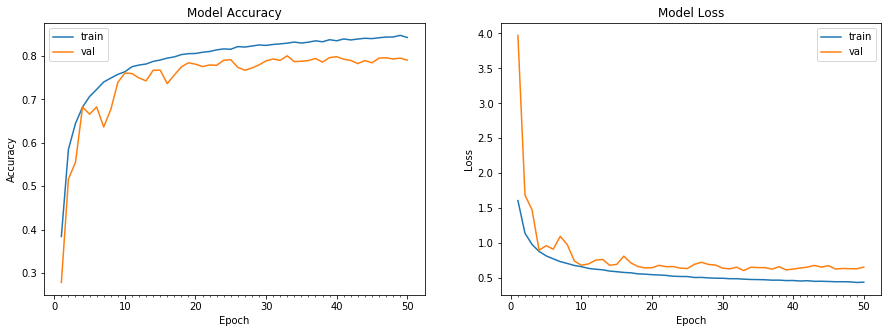

Accuracy on test data is: 79.06


In [106]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), callbacks=callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
def scheduler(epoch, lr):
  return round(0.002 * 1/(1 + 0.319 * epoch), 10)

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,LearningRateScheduler(scheduler,verbose=1)]

In [128]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), callbacks=callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=195, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.002.
195/195 [==============================] - 49s 250ms/step - loss: 1.6837 - acc: 0.3599 - val_loss: 5.7000 - val_acc: 0.2046

Epoch 00001: val_acc improved from -inf to 0.20460, saving model to weights-improvement-01-0.20.hdf5
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0015163002.
195/195 [==============================] - 25s 126ms/step - loss: 1.1556 - acc: 0.5786 - val_loss: 1.5660 - val_acc: 0.4828

Epoch 00002: val_acc improved from 0.20460 to 0.48280, saving model to weights-improvement-02-0.48.hdf5
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0012210012.
195/195 [==============================] - 25s 126ms/step - loss: 0.9962 - acc: 0.6388 - val_loss: 1.2363 - val_acc: 0.5732

Epoch 00003: val_acc improved from 0.48280 to 0.57320, saving model to weights-improvement-03-0.57.hdf5
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning r

KeyboardInterrupt: ignored